<h1> DS200A Computer Vision Assignment</h1>

In [1]:
from datainput import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from PIL import Image, ImageChops

# try not to printout train_data['Pictures'] directly, takes a while
train_path = './20_categories_training/'
train_data = read_train_data(train_path)

# val_path = './20_Validation/'
# test_data = read_test_data(val_path)

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


Note additional python code is imported that will serve the function of NB1

## Feature Extraction

In [2]:
class feature_extract:
    """class method for easy plotting and function call"""
    def __init__(self):
        self.names = {0:"image size",
                        1:"aspect ratio",
                        2:"red-channel average",
                        3:"green-channel average",
                        4:"blue-channel average",
                        5:"red-channel variance",
                        6:"green-channel variance",
                        7:"blue-channel variance",
                        8:"laplacian average",
                        9:"laplacian variance",
                      
                        11:"red-channel quantiles",
                        12:"green-channel quantiles",
                        13:"blue-channel quantiles",
                        14:"laplacian quantiles"}
        
        self.funcs = {0:feature_extract.ft_size, 
                    1:feature_extract.ft_aspect_ratio,
                    2:feature_extract.ft_r_mean,
                    3:feature_extract.ft_g_mean,
                    4:feature_extract.ft_b_mean,
                    5:feature_extract.ft_r_var,
                    6:feature_extract.ft_g_var,
                    7:feature_extract.ft_b_var,
                    8:feature_extract.ft_e_mean,
                    9:feature_extract.ft_e_var, 
                      
                    11:feature_extract.ft_r_quantile,
                    12:feature_extract.ft_g_quantile,
                    13:feature_extract.ft_b_quantile,
                    14:feature_extract.ft_e_quantile}
        
        self.labels = {0:"Airplanes", 1:"Bear", 2:"Blimp", 3:"Comet", 4:"Crab", 
           5:"Dog", 6:"Dolphin", 7:"Giraffe", 8:"Goat", 9:"Gorilla", 
           10:"Kangaroo", 11:"Killer-Whale", 12:"Leopards", 13:"Llama", 
           14:"Penguin", 15:"Porcupine", 16:"Teddy-Bear", 17:"Triceratops", 
           18:"Unicorn", 19:"Zebra"}
        
    
    
    ### scalar features
    @staticmethod
    def ft_size(image):
        # Returns the pixel size of the image
        return image.size
    @staticmethod
    def ft_aspect_ratio(image):
        #Returns the aspect ratio of the image
        return image.shape[1]/image.shape[0]
    @staticmethod
    def ft_r_mean(image):
        # Returns the average of the red-channel pictures for the images
        return np.mean(image[:,:,0]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft_g_mean(image):
        # the average of the green-channel pictures for the images
        return np.mean(image[:,:,1]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft_b_mean(image):
        # the average of the blue-channel pictures for the images
        return np.mean(image[:,:,2]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft_r_var(image):
        # the absolute variance of the red-channel for the images
        return np.var(image[:,:,0]) if len(image.shape)==3 else np.var(image)
    @staticmethod
    def ft_g_var(image):
        # the absolute variance of the blue-channel for the images
        return np.var(image[:,:,1]) if len(image.shape)==3 else np.var(image)
    @staticmethod
    def ft_b_var(image):
        # the absolute variance of the green-channel for the images
        return np.var(image[:,:,2]) if len(image.shape)==3 else np.var(image)
    
    @staticmethod
    def ft_e_mean(image):
        # obtain laplacian/edge mean
        return np.mean(image)
    @staticmethod
    def ft_e_var(image):
        # obtain laplacian/edge variance
        return np.var(image)
    
        

    
    
    ### matrix features    
    
    @staticmethod
    def ft_r_quantile(image):
        # find various qunatile values in red channel
        return feature_extract.quantiles(image[:,:,0]) if len(image.shape)==3 else feature_extract.quantiles(image[:,:])
    @staticmethod
    def ft_g_quantile(image):
        # find various qunatile values in green channel
        return feature_extract.quantiles(image[:,:,1]) if len(image.shape)==3 else feature_extract.quantiles(image[:,:])
    @staticmethod
    def ft_b_quantile(image):
        # find various qunatile values in blue channel
        return feature_extract.quantiles(image[:,:,2]) if len(image.shape)==3 else feature_extract.quantiles(image[:,:])
    @staticmethod
    def ft_e_quantile(image):
        # find quantile values in laplacian/edge 
        return feature_extract.quantiles(image)
    
    @staticmethod
    def ft_get_edge(image):
        image = feature_extract.convert_grey(image)
        return cv2.Laplacian(image, cv2.CV_64F, ksize=11)
    
    
    # helper functions
    @staticmethod
    def quantiles(image_single_color, divide = np.arange(0,1.1,0.1)):
        return np.quantile(image_single_color.flatten(), divide)
    
    @staticmethod
    def resize_image(image, xsize = 20, ysize = 15):
        # resize to 4x3 images
        return cv2.resize(image, (xsize, ysize), interpolation=cv2.INTER_AREA)
    
    @staticmethod
    def convert_grey(image):
        # convert rgb image to gray
        if len(image.shape) == 2: return image
        return 0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2]
    
    @staticmethod
    def trim(image):
        # trim empty background spaces
        image = Image.fromarray(image)
        bg1 = Image.new(image.mode, image.size, image.getpixel((0,0)))
        
        diff1 = ImageChops.difference(image, bg1)
        diff1 = ImageChops.add(diff1, diff1, 2.0, -100)
        bbox1 = diff1.getbbox()
        if bbox1:
            image = image.crop(bbox1)
        
        bg2 = Image.new(image.mode, image.size, image.getpixel((image.width-1,image.height-1)))
        diff2 = ImageChops.difference(image, bg2)
        diff2 = ImageChops.add(diff2, diff2, 2.0, -100)
        bbox2 = diff2.getbbox()
        if bbox2:
            image = image.crop(bbox2)
            
        return np.array(image)
    
    @staticmethod
    def ft_shrinked_gray(image):
        # shrink image first and then convert to gray, return flattened image array
        image = feature_extract.resize_image(image)
        return feature_extract.convert_grey(image).flatten()
    
    # intermediate functions
    @staticmethod
    def trim_all(images):
        # convert images series
        return images.apply(feature_extract.trim)
    @staticmethod
    def edge_all(images):
        # convert images seris
        return images.apply(feature_extract.ft_get_edge)
    

## DataFrame Creation

In [3]:
def feature_frame(df):
    # input original training_data set
    FE = feature_extract()
    images = df.Pictures
    # trim all images
    print('Trim all images..')
    images = FE.trim_all(images)
    df_X = pd.DataFrame()
    
    for i in range(2):
        print('Processing..',FE.names[i])
        df_X[FE.names[i]] = images.apply(FE.funcs[i])
    # convert all images to same size first 400x300
    images = pd.Series(images.apply(lambda x: FE.resize_image(x, 400, 300)))
    # cache laplacian
    laplacian = FE.edge_all(images)
    # add all scalar features
    for i in range(2,10):
        print('Processing..',FE.names[i])
        if i in [8,9]:
            df_X[FE.names[i]] = laplacian.apply(FE.funcs[i])
        else:
            df_X[FE.names[i]] = images.apply(FE.funcs[i])
    
    for j in range(11,15):
        print('Processing..',FE.names[j])
        if j == 14:
            temp = laplacian.apply(FE.funcs[j]).tolist()
        else:
            temp = images.apply(FE.funcs[j]).tolist()
        temp = pd.DataFrame(temp, columns=[FE.names[j]+'_'+str(x) for x in np.arange(len(temp[0]))])
        df_X = pd.concat([df_X, temp], axis=1)
    if 'Encoding' in df.columns:
        df_X['Encoding'] = df.Encoding
    return df_X



## Crop Images

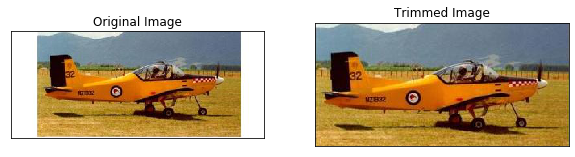

In [4]:
img = train_data.iloc[0,0]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
cropped = feature_extract.trim(img)
plt.subplot(1,2,2), plt.imshow(cropped), plt.title('Trimmed Image'), plt.xticks([]), plt.yticks([])
plt.savefig('images/trimexample')
plt.show()

In [5]:
# trim all images
train_data['Pictures'] = feature_extract.trim_all(train_data.Pictures)

## Number of Pictures in Classes

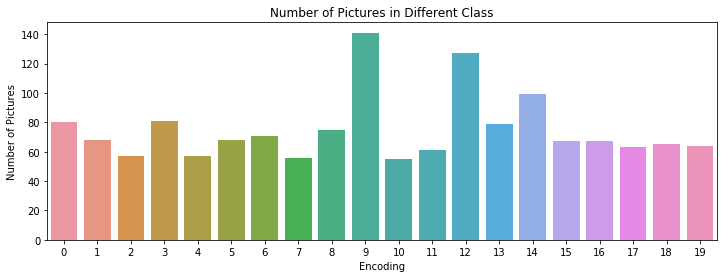

In [6]:
plt.figure(figsize=(12,4))
cnt =  train_data.groupby('Encoding').count()
sns.barplot(cnt.index,cnt.Pictures)
plt.ylabel('Number of Pictures')
plt.title('Number of Pictures in Different Class',fontsize = 12)
plt.savefig('images/count')

## Image Size Distributions

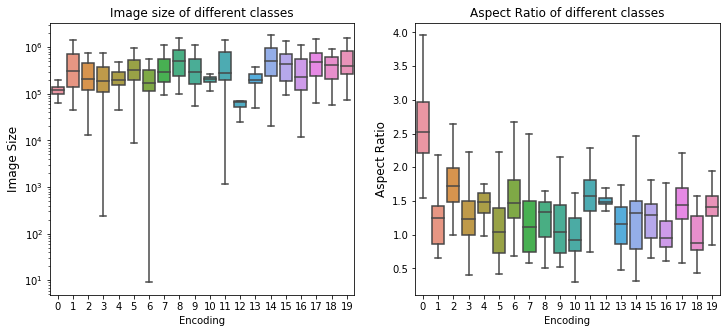

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(train_data.Encoding,(train_data['Pictures'].apply(feature_extract.ft_size)), showfliers=False)
plt.title("Image size of different classes",fontsize = 12)
plt.yscale("log")
plt.ylabel("Image Size",fontsize = 12)
plt.subplot(1,2,2)
sns.boxplot(train_data.Encoding,train_data['Pictures'].apply(feature_extract.ft_aspect_ratio), showfliers=False)
plt.title("Aspect Ratio of different classes",fontsize = 12)
plt.ylabel("Aspect Ratio",fontsize = 12)

plt.savefig('images/aa')

## Resize Images

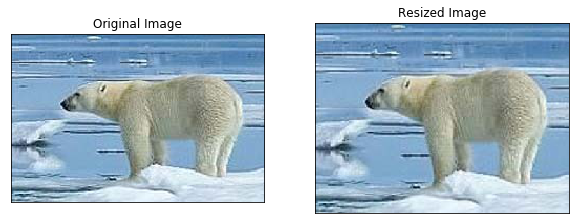

In [8]:
# example of resizing image
img = train_data.Pictures[100]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
resized = feature_extract.resize_image(img, 400, 300)
plt.subplot(1,2,2), plt.imshow(resized, cmap = 'gray'), plt.title('Resized Image'), plt.xticks([]), plt.yticks([])
plt.savefig('images/resizedexample')
plt.show()

## Obtain RGB Features

In [9]:
# obtain feature dataframe for easier plotting. 
# This is slightly out of order as originally feature_frame was last step
# train_data = read_train_data(train_path)
data = feature_frame(train_data)

Trim all images..
Processing.. image size
Processing.. aspect ratio
Processing.. red-channel average
Processing.. green-channel average
Processing.. blue-channel average
Processing.. red-channel variance
Processing.. green-channel variance
Processing.. blue-channel variance
Processing.. laplacian average
Processing.. laplacian variance
Processing.. red-channel quantiles
Processing.. green-channel quantiles
Processing.. blue-channel quantiles
Processing.. laplacian quantiles


## Mean

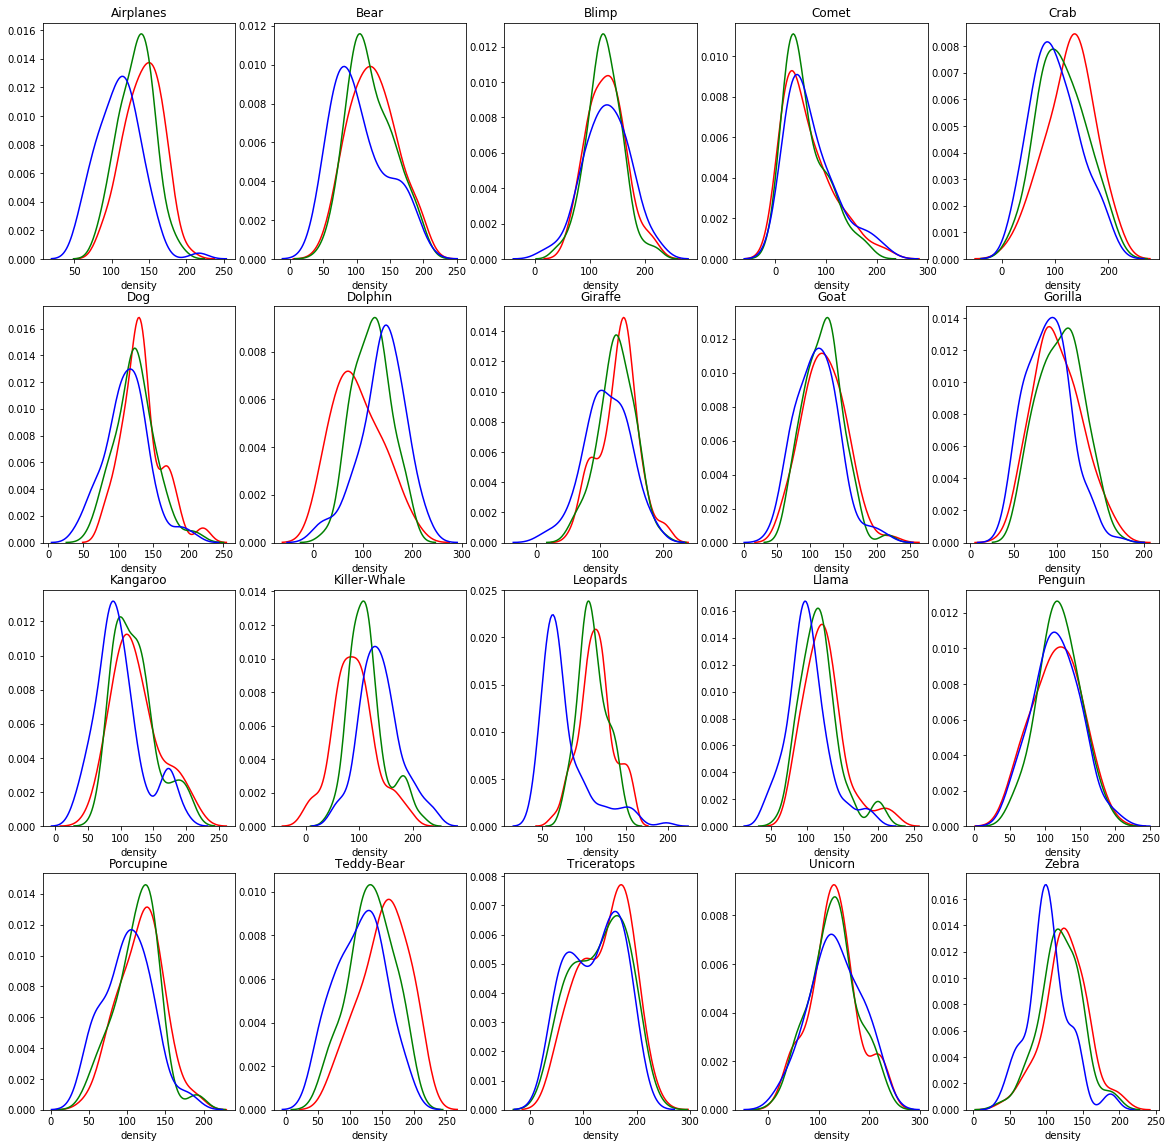

In [10]:
# RGB Mean
FE = feature_extract()
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(4,5,i+1)
    sns.distplot(train_data.loc[train_data['Encoding']==i,'Pictures'].apply(FE.ft_r_mean),hist = False,color = 'r')
    sns.distplot(train_data.loc[train_data['Encoding']==i,'Pictures'].apply(FE.ft_g_mean),hist = False,color = 'g')
    sns.distplot(train_data.loc[train_data['Encoding']==i,'Pictures'].apply(FE.ft_b_mean),hist = False,color = 'b')
    plt.xlabel('density')
    plt.title(FE.labels[i])
plt.savefig('images/RGB.jpg')

## Colored Variances

/Users/joeylou/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/joeylou/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/joeylou/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 

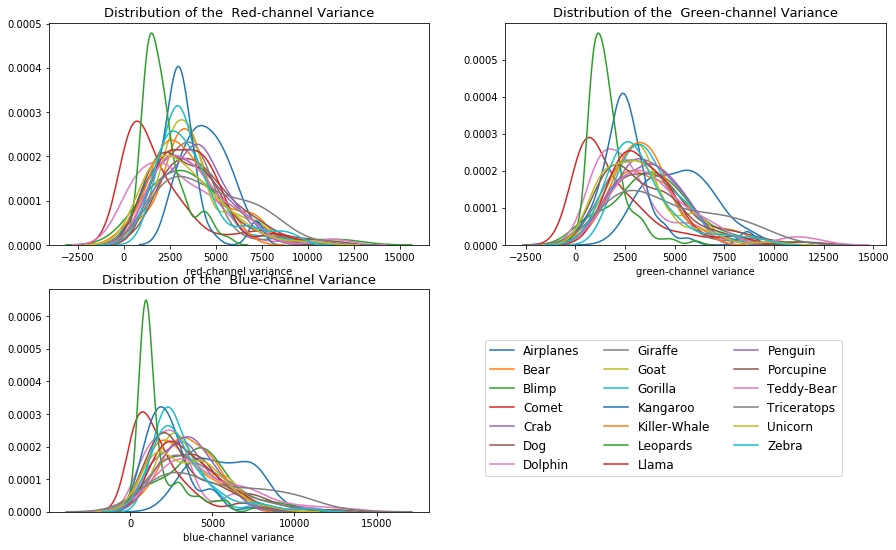

In [11]:
plt.figure(figsize=(15,9))

for i in range(20):
    plt.subplot(2,2,1)
    sns.distplot(data.loc[data['Encoding']==i,'red-channel variance'],hist = False)
    plt.title("Distribution of the  Red-channel Variance",fontsize = 13)

    plt.subplot(2,2,2)
    sns.distplot(data.loc[data['Encoding']==i,'green-channel variance'],hist = False)
    plt.title("Distribution of the  Green-channel Variance",fontsize = 13)

    plt.subplot(2,2,3)
    sns.distplot(data.loc[data['Encoding']==i,'blue-channel variance'],hist = False,label = FE.labels[i])

    plt.title("Distribution of the  Blue-channel Variance",fontsize = 13)


plt.legend(loc='upper right',ncol = 3,bbox_to_anchor=(2.1,0.8),borderaxespad = .5,fontsize = 12)
plt.savefig("images/ss")

## Correlation Plot

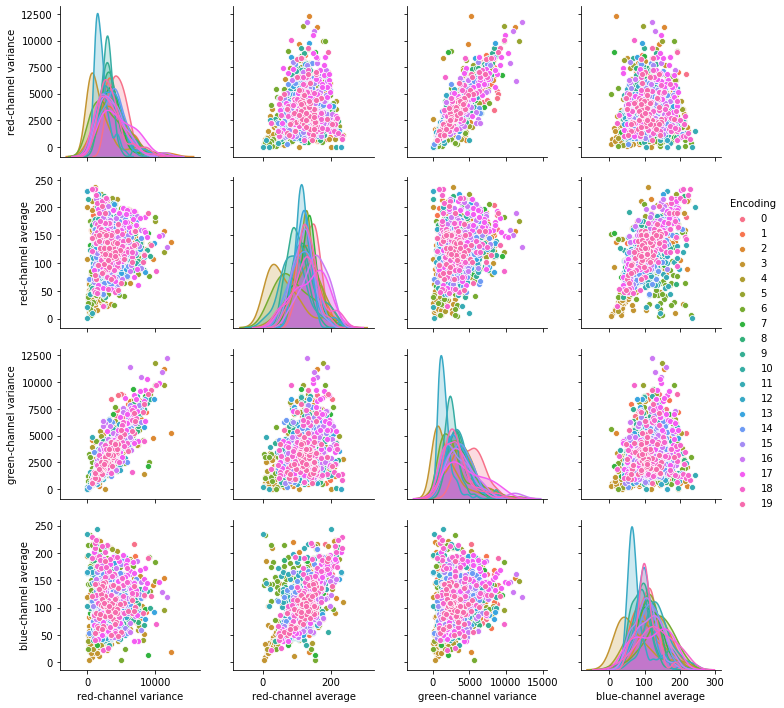

In [12]:
# pairwise plot between colored variance
sns.pairplot(data,vars=["red-channel variance", "red-channel average", "green-channel variance","blue-channel average"],hue = 'Encoding')
plt.savefig('images/pairplot var')

## Colored Quantiles

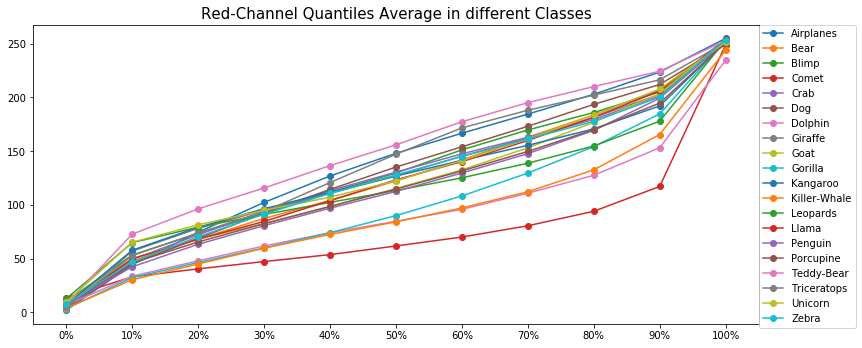

In [13]:
aver_red_quantiles = data.groupby('Encoding').apply(lambda x: np.mean(x.loc[:,'red-channel quantiles_0':'red-channel quantiles_10']))
#aver_red_quantiles.loc[1]
plt.figure(figsize=(13,5.5))
for i in range(20):
    plt.plot(aver_red_quantiles.columns,aver_red_quantiles.loc[i],label = FE.labels[i],linestyle='-',marker='o')
plt.legend(loc=2, bbox_to_anchor=(1.001,1),borderaxespad = 0)
plt.xticks(aver_red_quantiles.columns,['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title("Red-Channel Quantiles Average in different Classes", fontsize = 15)
plt.savefig('red quantiles aver')

## Find Edges

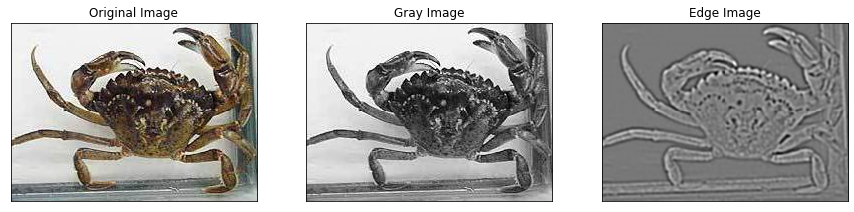

In [14]:
img = train_data.iloc[302,0]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
grey = feature_extract.convert_grey(img)
plt.subplot(1,3,2), plt.imshow(grey, cmap = 'gray'), plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
lap = feature_extract.ft_get_edge(img)
plt.subplot(1,3,3), plt.imshow(lap, cmap = 'gray'), plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.savefig('images/lapexample')
plt.show()

## Laplacian Scalar Plot

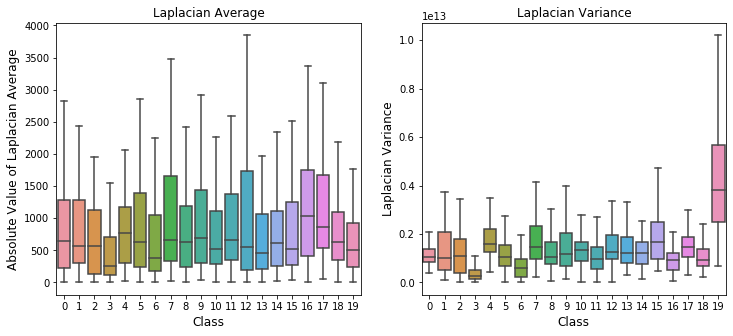

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data.Encoding,np.abs(data['laplacian average']), showfliers=False)
plt.title("Laplacian Average",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Absolute Value of Laplacian Average',fontsize=12)
#plt.yscale('symlog')
plt.subplot(1,2,2)
sns.boxplot(data.Encoding,data['laplacian variance'], showfliers=False)
plt.title("Laplacian Variance",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Laplacian Variance',fontsize=12)

plt.savefig('images/Laplacian')

## Shrinking GrayScale Image

In [16]:
train_data['Pictures'] = feature_extract.trim_all(train_data.Pictures)

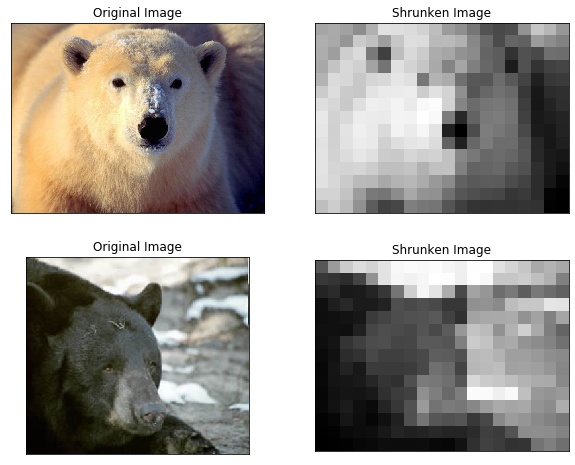

In [17]:
# tried to use flattened shrunken image as matrix based feature
img = train_data.Pictures[101]
plt.figure(figsize=(10,8))
plt.subplot(2,2,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
sg = feature_extract.ft_shrinked_gray(img).reshape(15,20)
plt.subplot(2,2,2), plt.imshow(sg, cmap = 'gray'), plt.title('Shrunken Image'), plt.xticks([]), plt.yticks([])

img = train_data.Pictures[102]
plt.subplot(2,2,3), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
sg = feature_extract.ft_shrinked_gray(img).reshape(15,20)
plt.subplot(2,2,4), plt.imshow(sg, cmap = 'gray'), plt.title('Shrunken Image'), plt.xticks([]), plt.yticks([])
plt.savefig('images/shrunkenexample')
plt.show()

## Additional EDA

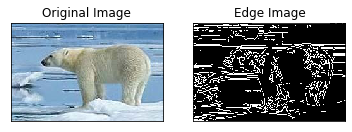

In [18]:
# Canny edge detection
img = train_data.iloc[100,0]
edges = cv2.Canny(img, 50, 250)

plt.subplot(121),plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Edge Image')
plt.show()

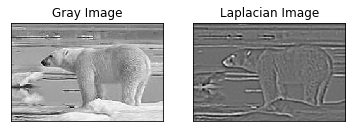

In [19]:
img = FE.convert_grey(img)
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=11)
plt.subplot(121),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Gray Image')
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Laplacian Image')
plt.show()

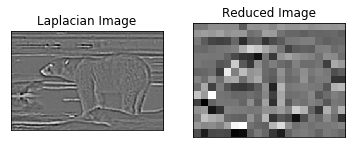

In [20]:
# pooling on edge image
img = laplacian
plt.subplot(1,2,1), plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Laplacian Image')
img_resized = FE.resize_image(img, 20, 15)
plt.subplot(1,2,2), plt.imshow(img_resized, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Reduced Image')
plt.show()

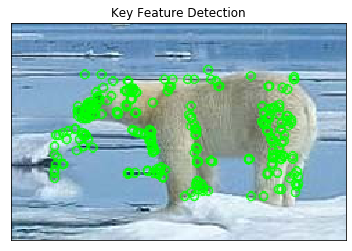

In [21]:
# Oriented FAST and Rotated BRIEF
img = train_data.iloc[100,0]
# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, np.array([]), color=(0,255,0), flags=0)
plt.imshow(img2), plt.xticks([]), plt.yticks([])
plt.title('Key Feature Detection')
plt.show()

In [22]:
if __name__ == "__main__":
    # test feature frame creation
    temp = feature_frame(train_data.iloc[:100,])

Trim all images..
Processing.. image size
Processing.. aspect ratio
Processing.. red-channel average
Processing.. green-channel average
Processing.. blue-channel average
Processing.. red-channel variance
Processing.. green-channel variance
Processing.. blue-channel variance
Processing.. laplacian average
Processing.. laplacian variance
Processing.. red-channel quantiles
Processing.. green-channel quantiles
Processing.. blue-channel quantiles
Processing.. laplacian quantiles


## Referenced:

1. Canny Edge Detection, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html 

2. Oriented FAST and Rotated BRIEF, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html#orb
